https://medium.com/@rohan1925/here-we-will-create-a-simple-cats-and-dogs-classification-model-using-keras-the-c88e15a6af9d

In [1]:
from google.colab import drive
drive.mount('/Drive')

Mounted at /Drive


In [22]:
import numpy as np
import tensorflow
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, imageio
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [23]:
model=Sequential()
#convolution #1.1:filters/feature maps/kernels=64,kernel_size=3x3,input_shape=224x224x3,stride=1,padding='same',activation='relu'
model.add(Conv2D(
    input_shape=(224,224,3),
    filters=64,
    kernel_size=(3,3),
    strides=1,
    padding='same', #padding='same' means size of fearure map is same of 
                     #output feature map
    activation='relu'
    ))

#convolution #1.2:filters/feature maps/kernels=64,kernel_size=3x3,input_shape=224x224x3,stride=1,padding='same',activation='relu'
model.add(Conv2D(
    input_shape=(224,224,3),
    filters=64,
    kernel_size=(3,3),
    strides=1,
    padding='same', #padding='same' means size of fearure map is same of 
                     #output feature map
    activation='relu'
    ))

#subsampling or maxpool or average pool
#maxpool #1:pool_size=3x3,strides=2,input=224x224x64,output=112x112x64
model.add(MaxPool2D(
    pool_size=(3,3),
    strides=2,
    padding='same' #padding='same' means size of fearure map is same of 
                     #output feature map
    ))

#convolution #2.1:feature maps/filters/kernel=128,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=128,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))

#convolution #2.2:feature maps/filters/kernel=128,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=128,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))

#convolution #2.3:feature maps/filters/kernel=128,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=128,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))


#maxpooling #2:pool_size=3,3,strides=2,padding='same',input=112x112x128,output=56x56x256
model.add(MaxPool2D(
    pool_size=(3,3),
    strides=2,
    padding='same'
    ))


#convolution #3.1:filters/feature maps/kernels=256,kernel_size=3x3,stride=1,padding='same',activation='relu'
model.add(Conv2D(
    filters=256,
    kernel_size=(3,3),
    strides=1,
    padding='same', #padding='same' means size of fearure map is same of 
                     #output feature map
    activation='relu'
    ))

#convolution #3.2:filters/feature maps/kernels=256,kernel_size=3x3,stride=1,padding='same',activation='relu'
model.add(Conv2D(
    filters=256,
    kernel_size=(3,3),
    strides=1,
    padding='same', #padding='same' means size of fearure map is same of 
                     #output feature map
    activation='relu'
    ))


#convolution #3.3:filters/feature maps/kernels=256,kernel_size=3x3,stride=1,padding='same',activation='relu'
model.add(Conv2D(
    filters=256,
    kernel_size=(3,3),
    strides=1,
    padding='same', #padding='same' means size of fearure map is same of 
                     #output feature map
    activation='relu'
    ))


#maxpooling #2:pool_size=3,3,strides=2,padding='same',input=56x56x256,output=28x28256
model.add(MaxPool2D(
    pool_size=(3,3),
    strides=2,
    padding='same'
    ))

#convolution #4.1:feature maps/filters/kernel=512,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=512,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))

#convolution #4.2:feature maps/filters/kernel=512,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=512,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))

#convolution #4.3:feature maps/filters/kernel=512,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=512,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))

#maxpooling #3:pool_size=3,3,strides=2,padding='same',input=28x28x512,output=14x14x512
model.add(MaxPool2D(
    pool_size=(3,3),
    strides=2,
    padding='same'
    ))

#convolution #5.1:feature maps/filters/kernel=512,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=512,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))

#convolution #5.2:feature maps/filters/kernel=512,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=512,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))

#convolution #5.3:feature maps/filters/kernel=512,strides=1,kernel_size=3x3,padding='same'
model.add(Conv2D(
    filters=512,
    kernel_size=(3,3),
    padding='same'
    ))
model.add(Activation('relu'))

#maxpooling #4:pool_size=3,3,strides=2,padding='same',input=14x14x512,output=7x7x512
model.add(MaxPool2D(
    pool_size=(3,3),
    strides=2,
    padding='same'
    ))


In [24]:
#passing it to a fully connected layer,Here we do flatten
model.add(Flatten())

In [25]:
#fully connected layer #1:neurons=25088
#model.add(Dense(25088))
#model.add(Activation('relu'))
#fully connected layer #1:neurons=4096
model.add(Dense(4096))
model.add(Activation('relu'))
#fully connected layer #1:neurons=4096
model.add(Dense(4096))
model.add(Activation('relu'))

In [26]:
model.add(Dropout(0.25))


In [27]:
#output layer
model.add(Dense(2))
model.add(Activation('softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 activation_12 (Activation)  (None, 112, 112, 128)     0         
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 128)     147584    
                                                      

In [29]:
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [31]:

#part -2 Ftting the mages to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


In [32]:

test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        '/Drive/MyDrive/Classification algorithm/VGG/dataset/train',
        target_size=(224, 224),
        #since input size is 224x224
        batch_size=10,
        #class_mode='binary'
        )


Found 410 images belonging to 2 classes.


In [33]:

test_set = test_datagen.flow_from_directory(
        '/Drive/MyDrive/Classification algorithm/VGG/dataset/test',
        target_size=(224, 224),
        #since input size is 224x224
        batch_size=10,
        #class_mode='binary'
        )



Found 100 images belonging to 2 classes.


In [34]:

# Saving Best model

checkpoint_path = "/Drive/MyDrive/Classification algorithm/VGG/checkpoint path/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)



In [35]:

#https://www.markiiisys.com/blog/keras-modelcheckpoint-callback-yet-another-great-one/
#https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6?gi=364699793ef8
import tensorflow as tf

checkpoint_callback_4  = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    #If save_weights_only is set to True, only the weights are saved, not the model topology.  
    #If set to False, it saves the weights as well as the model topology.
    save_weights_only=True,
    monitor='val_accuracy',     # monitor="loss",
    #If the value is set to True and you specify it to monitor loss, it will check the loss after every epoch
    #If the loss went down, then it will save that model.  If it didn't go down, it won't save it.
    save_best_only=True,
    # I'll share a secret.  You can use auto and Keras is smart enough to know that with loss, 
    #it should use min and with accuracy it should use max.
    mode="auto",
    #I am using epoch so it saves the model after every epoch,
    save_freq="epoch")



In [36]:
import tensorflow
from tensorflow.keras.optimizers import SGD
sgd = tensorflow.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile( loss = "categorical_crossentropy", 
               optimizer = sgd, 
               metrics=['accuracy']
             )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [37]:
history=model.fit_generator(
    training_set,
    #https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch
    steps_per_epoch=41,


    epochs=13,
    #not nb_epoch=130,
    validation_data=test_set,
    validation_steps=10,
    callbacks=[checkpoint_callback_4])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/13
41/41 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5683
Epoch 1: val_accuracy improved from -inf to 0.56000, saving model to /Drive/MyDrive/Classification algorithm/VGG/checkpoint path/cp-0001.ckpt
41/41 [==============================] - 18s 407ms/step - loss: 0.6926 - accuracy: 0.5683 - val_loss: 0.6923 - val_accuracy: 0.5600
Epoch 2/13
41/41 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5829
Epoch 2: val_accuracy did not improve from 0.56000
41/41 [==============================] - 12s 300ms/step - loss: 0.6911 - accuracy: 0.5829 - val_loss: 0.6912 - val_accuracy: 0.5600
Epoch 3/13
41/41 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.5829
Epoch 3: val_accuracy did not improve from 0.56000
41/41 [==============================] - 12s 290ms/step - loss: 0.6898 - accuracy: 0.5829 - val_loss: 0.6905 - val_accuracy: 0.5600
Epoch 4/13
41/41 [==============================] - ETA: 0s - loss: 0.6888 - a

KeyboardInterrupt: ignored

In [54]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [55]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=2, activation="sigmoid"))

In [56]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_42 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_44 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [58]:

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/Drive/MyDrive/Classification algorithm/VGG/dataset/train",target_size=(224,224),batch_size=10)
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/Drive/MyDrive/Classification algorithm/VGG/dataset/test", target_size=(224,224),batch_size=10)


Found 410 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [60]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(
    "/Drive/MyDrive/Classification algorithm/VGG/vgg16_1.h5", 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False, 
    mode='auto', 
    period=1)


In [61]:

early = EarlyStopping(
    monitor='val_accuracy', 
    min_delta=0, 
    patience=20, 
    verbose=1, 
    mode='auto')


In [62]:


hist = model.fit_generator(
    steps_per_epoch=41,
    generator=traindata, 
    validation_data= testdata, 
    validation_steps=10,
    epochs=100,
    callbacks=[checkpoint,early])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
41/41 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9585
Epoch 1: val_accuracy improved from -inf to 0.86000, saving model to /Drive/MyDrive/Classification algorithm/VGG/vgg16_1.h5
41/41 [==============================] - 16s 405ms/step - loss: 0.1059 - accuracy: 0.9585 - val_loss: 0.5358 - val_accuracy: 0.8600
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 0.1960 - accuracy: 0.9390
Epoch 2: val_accuracy improved from 0.86000 to 0.93000, saving model to /Drive/MyDrive/Classification algorithm/VGG/vgg16_1.h5
41/41 [==============================] - 17s 412ms/step - loss: 0.1960 - accuracy: 0.9390 - val_loss: 0.4708 - val_accuracy: 0.9300
Epoch 3/100
41/41 [==============================] - ETA: 0s - loss: 0.1605 - accuracy: 0.9415
Epoch 3: val_accuracy did not improve from 0.93000
41/41 [==============================] - 10s 231ms/step - loss: 0.1605 - accuracy: 0.9415 - val_loss: 0.2221 - val_accuracy: 0.9300
Epoch 4/100
41/41

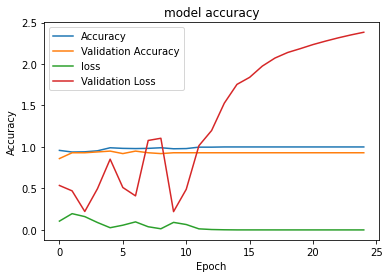

In [63]:
#import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


In [69]:
import pandas as pd

metrics_df = pd.DataFrame(hist.history)


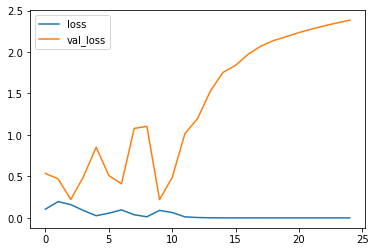

In [70]:

metrics_df[["loss","val_loss"]].plot()


In [71]:

metrics_df.columns


Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [73]:

loss, accuracy = model.evaluate(test_set)
print('Accuracy on test dataset:', accuracy)


10/10 [==============================] - 1s 81ms/step - loss: 1.6717 - accuracy: 0.5600
Accuracy on test dataset: 0.5600000023841858


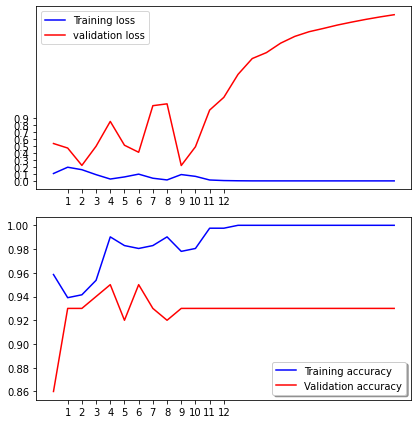

In [74]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 13, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend()

ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 13, 1))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

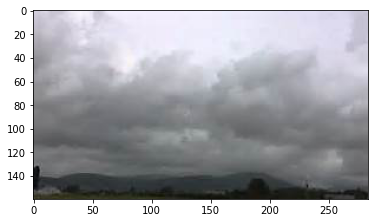

In [75]:
img_path="/Drive/MyDrive/Classification algorithm/VGG/dataset/test/cloudy/cloudy249.jpg"
test_image_orginal = image.load_img(img_path)
plt.imshow(test_image_orginal)

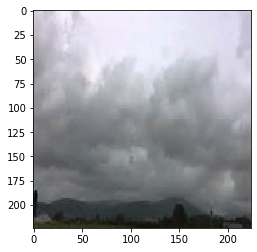

In [76]:


test_image = image.load_img(img_path, target_size=(224, 224))
plt.imshow(test_image)


In [77]:

test_image = image.img_to_array(test_image)
test_image.shape


(224, 224, 3)

In [78]:

test_image = np.expand_dims(test_image, axis=0)
test_image.shape


(1, 224, 224, 3)

https://www.youtube.com/watch?v=oOSXQP7C7ck

In [79]:

test_set.class_indices.items()


dict_items([('cloudy', 0), ('rain', 1)])

In [81]:


prediction = model.predict(test_image)
prediction


array([[1.0000000e+00, 3.7245957e-08]], dtype=float32)

**Prediction**

----------------------------------------------------------------------------------------------------
Prediction is :       cloudy
------------------------------------------------------------------------------------------------------------------------------------------------------


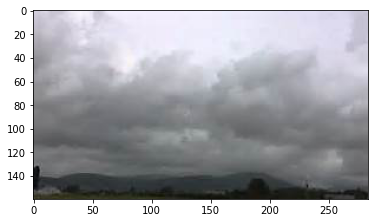

In [82]:

prediction = model.predict(test_image)
if(prediction[0][0]==1):
  print(f"-"*100)
  print("Prediction is :       cloudy")
  print(f"-"*150)
elif(prediction[0][1]==1):
  print(f"-"*150)
  print("Prediction is :       rain")

else:
  print("Unable to predict")


plt.imshow(test_image_orginal)
plt.show()

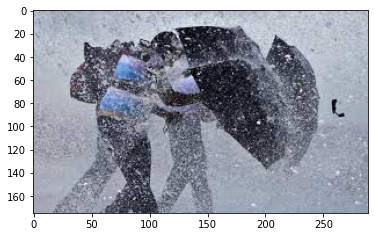

In [84]:
img_path="/Drive/MyDrive/Classification algorithm/VGG/dataset/test/rain/rain177.jpg"
test_image_orginal = image.load_img(img_path)
plt.imshow(test_image_orginal)

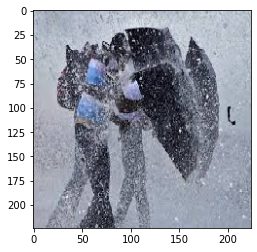

In [85]:


test_image = image.load_img(img_path, target_size=(224, 224))
plt.imshow(test_image)


In [86]:

test_image = image.img_to_array(test_image)
test_image.shape


(224, 224, 3)

In [87]:

test_image = np.expand_dims(test_image, axis=0)
test_image.shape


(1, 224, 224, 3)

------------------------------------------------------------------------------------------------------------------------------------------------------
Prediction is :       rain
------------------------------------------------------------------------------------------------------------------------------------------------------


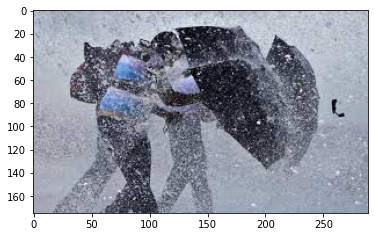

In [89]:

prediction = model.predict(test_image)
if(prediction[0][0]==1):
  print(f"-"*100)
  print("Prediction is :       cloudy")
  print(f"-"*150)
elif(prediction[0][1]==1):
  print(f"-"*150)
  print("Prediction is :       rain")
  print(f"-"*150)

else:
  print("Unable to predict")


plt.imshow(test_image_orginal)
plt.show()